# The problem 
I magine someone runs an experiment (in a lab, collects data from a society, etc.) and gets i.i.d data $\mathcal{D} = \{x_i,y_i\}_{i=1}^N$ and rund the following linear regression on the data

$y_i = \alpha + \beta x_i +\epsilon_i$. The scientists knows that the error term comes from a normal distribution, i.e., 

$\epsilon_i \sim \mathcal{N}(0,\sigma^2)$

with known $\sigma$.

Given the collected/observed data the scientis get a set of estimators $(\hat{\alpha},\hat{\beta})$. 

The estimators are random creatures too, because they are function of the random $\mathcal{D}$. Now the question is what kind of random variables $(\hat{\alpha},\hat{\beta})$ are?

The scientist can go to the lab again and collect new random data. They can do for many times and plot (after some normalization) plot the histogram of these random variables. 

The **Central Limit Theorem** says these random variables should have normal distributions. 

This code illustrates this.

## Packages and plotting setups

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from matplotlib import cm

import os
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [2]:
fontsize= 18
ticksize = 18
figsize = (12, 6)
params_plt = {"text.usetex": True,
    'font.family':'serif',
    "figure.figsize":figsize, 
    'figure.dpi': 80,
    'figure.edgecolor': 'k',
    'font.size': fontsize, 
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'xtick.labelsize': ticksize,
    'ytick.labelsize': ticksize
}
plt.rcParams.update(params_plt) 

## Generating the data: $\mathcal{D}\{x_i,y_i\}_{i=1}^N$

In [3]:
class DGP():
    def __init__(self,
                mu = 0.0 ,
                sigma = 1.0,
                mu_noise = 0.0,
                sigma_noise = 0.5,
                a = 0.0,
                b = 1.5, 
                N = 30,
                seed = 3):
        self.mu = mu
        self.sigma = sigma
        self.mu_noise = mu_noise
        self.sigma_noise = sigma_noise
        self.a = a
        self.b = b
        self.N = N
        self.seed = seed
        np.random.seed(seed=self.seed)
        self.x_reg = np.random.normal(self.mu, self.sigma, self.N).reshape(self.N,1)
        self.noise = np.random.normal(self.mu_noise, self.sigma_noise, self.N).reshape(self.N,1)
        self.y = self.a + self.b*self.x_reg + self.noise
        self.data = np.concatenate((self.x_reg,self.y),1)
    

In [4]:
data = DGP(seed = 3).data
x_data = data[:,0:-1]
y_data = data[:,[-1]]
reg = LinearRegression().fit(x_data, y_data)
print(reg.coef_,reg.intercept_)

[[1.57018836]] [-0.15821486]


In [5]:
def draw_reg(n):
    results = np.zeros(n)
    for i in range(n):
        data = DGP(seed = i).data
        x_data = data[:,0:-1]
        y_data = data[:,[-1]]
        var_beta_hat = (DGP(seed = i).sigma_noise**2)/np.matmul(x_data.transpose(),x_data)
        reg = LinearRegression().fit(x_data, y_data)
        results[i] = (reg.coef_ - DGP(seed = i).b)/np.sqrt(var_beta_hat)
    return results

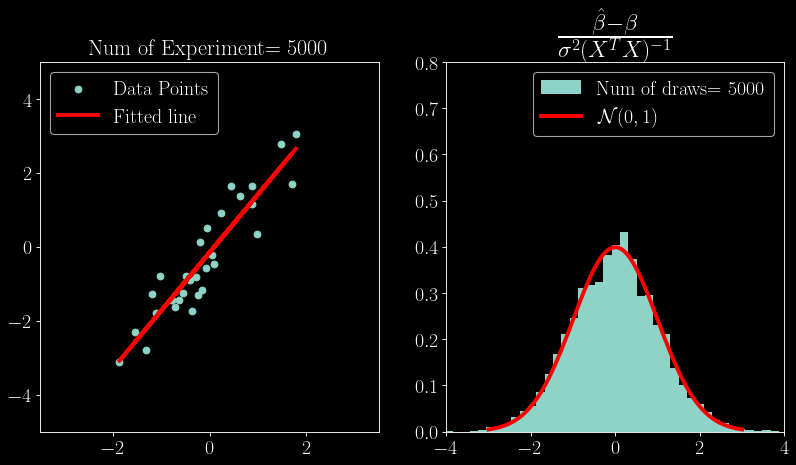

In [6]:
plt.style.use('dark_background')

n_draw = 5000

plt.subplot(1, 2, 1)
plt.scatter(x_data , y_data, zorder=2,label= r"Data Points")
a_hat = reg.intercept_ 
b_hat = reg.coef_
y_hat = a_hat+b_hat*x_data
plt.plot(x_data,y_hat, color ='r', linewidth = '3.5', label = r"Fitted line")

plt.ylim(-5,5)
plt.xlim(-3.5,3.5)
plt.title(label = 'Num of Experiment= {}'.format(n_draw),  fontsize= 20 )

plt.legend(loc='upper left')


plt.subplot(1,2,2)
plt.hist(draw_reg(n_draw), bins=40, density=True, label = r"Num of draws"'= {}'.format(n_draw))
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color= 'r', linewidth = '3.5', label = r"$\mathcal{N}(0,1)$" )
plt.title(label = r"$\frac{\hat{\beta}-\beta}{\sigma^2 (X^T X)^{-1}}$",fontsize= 30)
plt.ylim(0.0,0.8)
plt.xlim(-4.0,4.0)
plt.legend(loc='upper right')

plt.show()

## Creating the animiation

In [7]:
n_draw_list = np.zeros(120)
for i in range(120):
    n_draw_list[i] = np.floor(33*np.exp(1+i/22))
n_draw_list[-1] = 20000    
n_draw_list = n_draw_list.astype(int)

In [ ]:
filenames = []
for draw in n_draw_list:
    
    plt.subplot(1, 2, 1)
    
    data_pl = DGP(seed = draw).data
    x_data_pl = data_pl[:,0:-1]
    y_data_pl = data_pl[:,[-1]]
    reg_pl = LinearRegression().fit(x_data_pl, y_data_pl)
    plt.scatter(x_data_pl , y_data_pl, zorder=2,label= r"Data Points")
    x_data_mesh = np.linspace(-3,3,10).reshape(10,1)
    a_hat_pl = reg_pl.intercept_ 
    b_hat_pl = reg_pl.coef_
    y_hat = a_hat_pl+b_hat_pl*x_data_mesh
    plt.plot(x_data_mesh,y_hat, color ='r', linewidth = '3.5', label = r"Fitted line")

    plt.ylim(-5,5)
    plt.xlim(-3.5,3.5)
    plt.title(label = 'Num of Experiment= {}'.format(draw),  fontsize= 20 )

    plt.legend(loc='best')
    plt.tight_layout()


    plt.subplot(1,2,2)
    plt.hist(draw_reg(draw), bins=40, density=True, label = r"Num of Experiments"'= {}'.format(draw))
    mu = 0
    variance = 1
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), color= 'r', linewidth = '3.5', label = r"$\mathcal{N}(0,1)$" )
    plt.title(label = r"$\frac{\hat{\beta}-\beta}{\sigma^2 (X^T X)^{-1}}$",fontsize= 30)
    plt.ylim(0.0,0.8)
    plt.xlim(-4.0,4.0)
    plt.legend(loc='best')
  
    plt.tight_layout()
    # create file name and append it to a list
    filename = f'{draw}.png'
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename)
    plt.close()# build gif
with imageio.get_writer('CLT.mp4', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)